In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [10]:
df = pd.read_csv('titanic_light.csv')
df

,pclass,name,sex,age,embarked,body,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,S,NaN,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,S,NaN,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,S,NaN,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,S,135.0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,S,NaN,0
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,C,328.0,0
1305,3,"Zabour, Miss. Thamine",female,NaN,C,NaN,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,C,304.0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,C,NaN,0


In [19]:
df = df.drop(columns=['body','name'])

In [30]:
df.isna().sum()

pclass      0
sex         0
age         0
embarked    0
survived    0
dtype: int64

In [27]:
df['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [38]:
df['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [29]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna("S")

In [31]:
df = pd.get_dummies(data=df,columns=['sex','embarked'],drop_first=True)
df

,pclass,age,survived,sex_male,embarked_Q,embarked_S
0,1,29.000000,1,False,False,True
1,1,0.916700,1,True,False,True
2,1,2.000000,0,False,False,True
3,1,30.000000,0,True,False,True
4,1,25.000000,0,False,False,True
...,...,...,...,...,...,...
1304,3,14.500000,0,False,False,False
1305,3,29.881135,0,False,False,False
1306,3,26.500000,0,True,False,False
1307,3,27.000000,0,True,False,False


In [32]:
X = df.drop(columns='survived')
y = df['survived']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [35]:
model.feature_importances_

array([0.16204616, 0.35400378, 0.42098071, 0.02042519, 0.04254417])

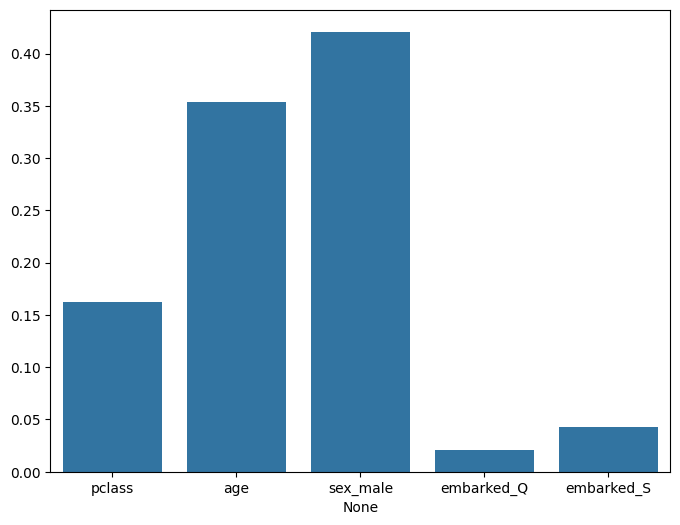

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x=X.columns,y=model.feature_importances_)
plt.show()